In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
%matplotlib notebook

In [3]:
ls

Aceh.xlsx*             Kalteng.xlsx*          Pop_2017.xlsx*
Analisa.ipynb*         Kaltim.xlsx*           Populasi.xls*
Bali.xlsx*             Kalut.xlsx*            Populasi.xlsx*
Bangka Belitung.xlsx*  Kepri.xlsx*            Riau.xlsx*
Banten.xlsx*           Lampung.xlsx*          Scraping-Rekap-UN-2017.xlsx*
Bengkulu 1.xlsx*       Maluku.xlsx*           Sulbar.xlsx*
coba.xlsx*             Malut.xlsx*            Sulsel.xlsx*
DKI Yogya.xlsx*        NTB.xlsx*              Sultenggara.xlsx*
Finish.png*            NTT.xlsx*              Sulteng.xlsx*
Gorontalo.xlsx*        Papua Barat.xlsx*      Sulut.xlsx*
Jakarta.xlsx*          Papua.xlsx*            Sumbar.xlsx*
Jambi.xlsx*            PDRB Kapita/           Sumsel.xlsx*
Jawa Barat.xlsx*       PDRB Per Kapita.xlsx*  Sumut.xlsx*
Jawa Tengah.xlsx*      PDRB.xlsx*             Training.ipynb*
Jawa Timur.xlsx*       PER Kpt.xlsx*          UN Analyses.ipynb*
Kalbar.xlsx*           Picture/
Kalsel.xlsx*           Pop_2017.xls*


In [4]:
data = pd.read_excel('Scraping-Rekap-UN-2017.xlsx')

In [6]:
def koreksi(y):
    if y.startswith('UNBK') == True:
        return 'UNBK'
    elif y[1].isdigit() == True:
        return float(y[:5])
    elif type(y) == float:
        return y
    else:
        return 0

In [7]:
provinsi_list = ['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu', 'DI Yogyakarta', 'DKI Jakarta', 'Gorontalo', 'Jambi', 
       'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara',
          'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua Barat', 'Papua', 'Riau', 'Sulawesi Barat',
          'Sulawesi Selatan', 'Sulawesi Tenggara',
        'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara']

In [8]:
Jawa = ['DI Yogyakarta', 'Jawa Timur', 'Jawa Barat', 'Jawa Tengah', 'DKI Jakarta', 'Banten']
Bali_Nusa = ['Bali', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat']
Maluku_Papua = ['Maluku', 'Maluku Utara', 'Papua', 'Papua Barat']
Sulawesi = ['Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Tengah', 'Sulawesi Utara', 'Gorontalo']
Sumatera = ['Sumatera Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Lampung', 'Kepulauan Riau', 'Bengkulu', 'Aceh',
           'Riau', 'Bangka Belitung', 'Jambi']
Kalimantan = ['Kalimantan Utara', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur']

In [9]:
def klasifikasi_pulau(x):
    if x in Jawa:
        return 'Jawa'
    elif x in Bali_Nusa:
        return 'Bali & Nusa Tenggara'
    elif x in Maluku_Papua:
        return 'Maluku & Papua'
    elif x in Sulawesi:
        return 'Sulawesi'
    elif x in Sumatera:
        return 'Sumatera'
    elif x in Kalimantan:
        return 'Kalimantan'

In [10]:
data['Pulau'] = data['Provinsi'].apply(klasifikasi_pulau)

In [11]:
data['IIUN tahun 2017'] = data['IIUN tahun 2017'].apply(koreksi)

In [12]:
data['IIUN tahun 2016'] = data['IIUN tahun 2016'].apply(koreksi)
data['IIUN tahun 2015'] = data['IIUN tahun 2015'].apply(koreksi)

In [13]:
data_jawa = data[data['Pulau'] == 'Jawa']
data_sumatera = data[data['Pulau'] == 'Sumatera']
data_sulawesi = data[data['Pulau'] == 'Sulawesi']
data_bali_nusa = data[data['Pulau'] == 'Bali & Nusa Tenggara']
data_maluku_papua = data[data['Pulau'] == 'Maluku & Papua']
data_kalimantan = data[data['Pulau'] == 'Kalimantan']

In [15]:
data_2017 = data[data['IIUN tahun 2017'] == 'UNBK']
data_2017 = data_2017[['Provinsi', 'Pulau', 'Nama Sekolah', 'Jumlah\nPeserta', 'Rerata IPA tahun 2017']]

In [18]:
sekolah_maks = data_2017[data_2017['Rerata IPA tahun 2017'] == max(data_2017['Rerata IPA tahun 2017'])]
sekolah_maks

,Provinsi,Pulau,Nama Sekolah,Jumlah Peserta,Rerata IPA tahun 2017
788,DKI Jakarta,Jawa,SMA NEGERI UNGGULAN MOHAMMAD HUSNI THAMRIN,75,86.54


In [19]:
sekolah_mins = data_2017[data_2017['Rerata IPA tahun 2017'] == min(data_2017['Rerata IPA tahun 2017'])]
sekolah_mins

,Provinsi,Pulau,Nama Sekolah,Jumlah Peserta,Rerata IPA tahun 2017
334,Aceh,Sumatera,SMA NEGERI 2 BEUTONG,9,27.61


In [20]:
sekolah_terbanyak = data_2017[data_2017['Jumlah\nPeserta'] == max(data_2017['Jumlah\nPeserta'])]
sekolah_terbanyak

,Provinsi,Pulau,Nama Sekolah,Jumlah Peserta,Rerata IPA tahun 2017
5122,Sumatera Utara,Sumatera,SMA NEGERI 1 MEDAN,618,62.9


In [21]:
sekolah_paling_sedikit = data_2017[data_2017['Jumlah\nPeserta'] == min(data_2017['Jumlah\nPeserta'])]
sekolah_paling_sedikit

,Provinsi,Pulau,Nama Sekolah,Jumlah Peserta,Rerata IPA tahun 2017
167,Aceh,Sumatera,SMA NEGERI 1 PULO ACEH,7,38.15


## Load population dataset

In [52]:
data_population = pd.read_excel('coba.xlsx')

In [53]:
data_population = data_population[['Provinsi', 'Populasi']]

In [54]:
data_population = data_population.sort_values('Provinsi')

In [55]:
def normalisasi(x):
    if type(x) == str:
        return float(x.replace(".", ""))
    else:
        return(x)

In [56]:
def lower_it(x):
    return x.lower()

In [57]:
data_population['Populasi'] = data_population['Populasi'].apply(normalisasi)

In [58]:
data_population['Provinsi'] = data_population['Provinsi'].apply(lower_it)

In [71]:
data_population = data_population.set_index('Provinsi')

## Load PDRB dataset

In [77]:
PDRB = pd.read_excel('PDRB.xlsx')

In [78]:
PDRB.head()

,Provinsi,2010,2011,2012,2013,2014,2015,2016
0,ACEH,101 545.24,108 217.63,114 552.08,121 331.13,127 897.07,128 980.13,137 277.42
1,SUMATERA UTARA,331 085.24,377 037.10,417 120.44,469 464.02,521 954.95,571 722.01,628 394.16
2,SUMATERA BARAT,105 017.74,118 674.29,131 435.65,146 899.83,164 944.26,179 404.74,195 682.53
3,RIAU,388 578.23,485 649.34,558 492.72,607 498.45,679 395.86,652 138.44,682 351.09
4,JAMBI,90 618.41,103 522.91,115 070.40,129 976.04,144 814.42,155 106.24,171 711.45


In [79]:
_ = [w.lower() for w in provinsi_list]

In [80]:
lo = [i.lower() for i in PDRB['Provinsi']]

In [81]:
PDRB['Provinsi'] = lo

In [82]:
PDRB = PDRB.sort_values('Provinsi')

In [83]:
def numerize(x):
    return float(x.replace(' ', ''))

In [84]:
PDRB[2016] = PDRB[2016].apply(numerize)

In [85]:
PDRB = PDRB.set_index('Provinsi')

## Max, Median, Mean, and Min in each of the province

In [141]:
maks = []
medians = []
mins = []
means = []

In [142]:
def pisah(x):
    global maks
    global medians
    global mins
    global meanss
    for i in x:
        a = pd.read_excel(i)
        a = a.sort_values('Rerata IPA tahun 2017')
        a['IIUN tahun 2017'] = a['IIUN tahun 2017'].apply(koreksi)
        a = a[a['IIUN tahun 2017'] == 'UNBK']
        a = a.sort_values('Rerata IPA tahun 2017')
        maks.append(a['Rerata IPA tahun 2017'].max())
        medians.append(a['Rerata IPA tahun 2017'].median())
        mins.append(a['Rerata IPA tahun 2017'].min())
        means.append(a['Rerata IPA tahun 2017'].mean())

In [143]:
data_excel = ['Aceh.xlsx', 'Bali.xlsx', 'Bangka Belitung.xlsx', 'Banten.xlsx', 'Bengkulu 1.xlsx', 'DKI Yogya.xlsx', 'Jakarta.xlsx', 'Gorontalo.xlsx', 'Jambi.xlsx', 
       'Jawa Barat.xlsx', 'Jawa Tengah.xlsx', 'Jawa Timur.xlsx', 'Kalbar.xlsx', 'Kalsel.xlsx', 'Kalteng.xlsx', 'Kaltim.xlsx', 'Kalut.xlsx', 'Kepri.xlsx', 'Lampung.xlsx', 'Maluku.xlsx', 'Malut.xlsx', 'NTB.xlsx', 
              'NTT.xlsx', 'Papua.xlsx', 'Papua Barat.xlsx', 'Riau.xlsx', 'Sulbar.xlsx', 'Sulsel.xlsx',
        'Sulteng.xlsx', 'Sultenggara.xlsx', 'Sulut.xlsx', 'Sumbar.xlsx', 'Sumsel.xlsx', 'Sumut.xlsx']

In [144]:
pisah(data_excel)

In [145]:
df = pd.DataFrame(maks)
df.columns = ['Max']
df['Median'] = medians
df['Min'] = mins
df['Mean'] = means

In [146]:
df['Provinsi'] = provinsi_list_lower

## Join All

In [148]:
PDRB_2016 = [i for i in PDRB[2016]]

In [149]:
df['PDRB 2016'] = PDRB_2016

In [152]:
data_populasi_2014 = [o for o in data_population['Populasi']]

In [153]:
df['Populasi'] = data_populasi_2014

In [161]:
df['Persentase Populasi'] = df['Populasi']/sum(df['Populasi'])*100

In [163]:
df['Persentase PDRB 2016'] = df['PDRB 2016']/sum(df['PDRB 2016'])

# Do the Analyses

In [165]:
warna = []

In [166]:
def pick_color(province):
    global warna
    global Jawa
    global Bali_Nusa
    global Maluku_Papua
    global Sulawesi
    global Sumatera
    global Kalimantan
    for i in province:
        if i in Jawa:
            warna.append('blue')
        if i in Bali_Nusa:
            warna.append('yellow')
        if i in Maluku_Papua:
            warna.append('grey')
        if i in Sulawesi:
            warna.append('green')
        if i in Sumatera:
            warna.append('red')
        if i in Kalimantan:
            warna.append('orange')

In [167]:
pick_color(provinsi_list)

In [196]:
df['Provinsi'] = provinsi_list

In [204]:
display_provinsi = [i for i in provinsi_list]
display_provinsi[2] = 'B. Belitung'
display_provinsi[12] = 'Kali. Barat'
display_provinsi[13] = 'Kali. Selatan'
display_provinsi[14] = 'Kali. Tengah'
display_provinsi[15] = 'Kali. Timur'
display_provinsi[16] = 'Kali. Utara'
display_provinsi[17] = 'Kep. Riau'
display_provinsi[21] = 'Nusa T. Barat'
display_provinsi[22] = 'Nusa T. Timur'
display_provinsi[26] = 'Sul. Barat'
display_provinsi[27] = 'Sul. Selatan'
display_provinsi[28] = 'Sul. Tenggara'
display_provinsi[29] = 'Sul. Tengah'
display_provinsi[30] = 'Sul. Utara'
display_provinsi[31] = 'Sum. Barat'
display_provinsi[32] = 'Sum. Selatan'
display_provinsi[33] = 'Sum. Utara'

In [197]:
df.head(20)

,Max,Median,Min,Mean,Provinsi,PDRB 2016,Populasi,Persentase Populasi,Persentase PDRB 2016
0,75.50,38.375,27.61,40.296296,Aceh,137277.42,4906835.0,1.947018,0.010845
1,81.54,62.420,43.89,61.199744,Bali,195376.31,4104900.0,1.628813,0.015435
2,71.40,50.130,37.04,51.987105,Bangka Belitung,65125.29,1343900.0,0.533256,0.005145
3,76.63,44.460,34.68,48.618397,Banten,516326.90,11704877.0,4.644462,0.040790
4,73.45,47.070,35.23,48.836809,Bengkulu,55402.51,1844800.0,0.732011,0.004377
5,80.95,61.170,46.26,62.851014,DI Yogyakarta,110098.34,3553100.0,1.409860,0.008698
6,86.54,64.760,41.40,65.837949,DKI Jakarta,2177119.88,10012271.0,3.972840,0.171993
7,65.27,43.860,34.02,44.041250,Gorontalo,31823.65,1115633.0,0.442680,0.002514
8,72.10,45.645,35.01,46.653514,Jambi,171711.45,3344400.0,1.327048,0.013565
9,80.24,49.200,35.48,51.149879,Jawa Barat,1652589.44,46029668.0,18.264440,0.130555


In [198]:
ukuran = [i*30 for i in df['Persentase Populasi']]

<IPython.core.display.Javascript object>


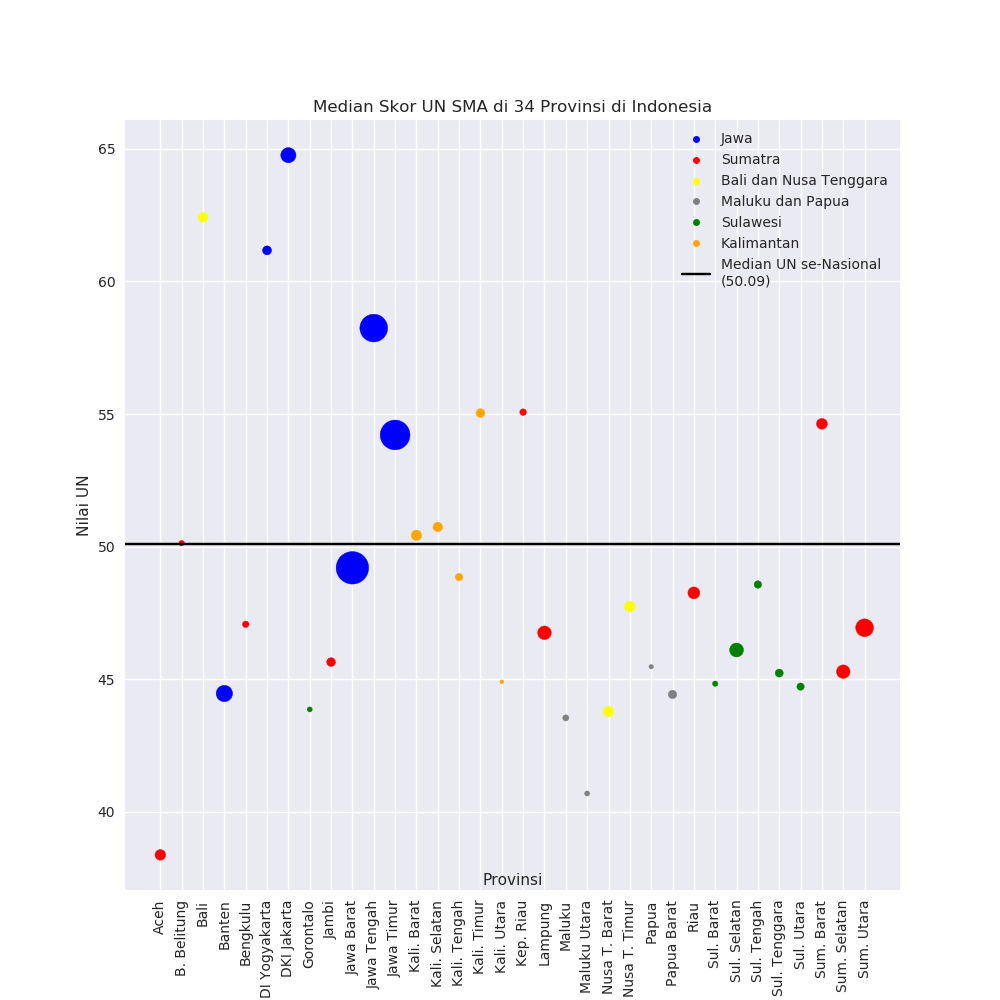

In [225]:
plt.figure(figsize=(10, 10))
plt.scatter(display_provinsi, df['Median'], s=ukuran, c=warna)
plt.axhline(data_2017['Rerata IPA tahun 2017'].median(), color='black')
plt.xticks(rotation='vertical');
plt.ylabel('Nilai UN');
plt.xlabel('Provinsi', labelpad=-90);
plt.title('Median Skor UN SMA di 34 Provinsi di Indonesia');
#plt.axvline(df['PDRB 2016'].median(), color='black', linestyle='--')

In [229]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='Jawa')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='Sumatra')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='.', linestyle='None',
                          markersize=10, label='Bali dan Nusa Tenggara')
grey_dot = mlines.Line2D([], [], color='grey', marker='.', linestyle='None',
                          markersize=10, label='Maluku dan Papua')
green_dot = mlines.Line2D([], [], color='green', marker='.', linestyle='None',
                          markersize=10, label='Sulawesi')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                          markersize=10, label='Kalimantan')
black_lines = mlines.Line2D([], [], color='black', linestyle='solid',
                          markersize=5, label='Median UN se-Nasional\n({})'.format(str(data_2017['Rerata IPA tahun 2017'].median())[:5]))

plt.legend(handles=[blue_dot, red_dot, yellow_dot, grey_dot, green_dot, orange_dot, black_lines], loc=0)
#plt.legend(handles=[black_lines], loc=2)

plt.show()

In [213]:
def onpick(event):
    origin = df_2.iloc[event.ind[0]]['Provinsi']
    UN = df_2.iloc[event.ind[0]]['Median']
    plt.gca().set_title('Provinsi {}\n dengan nilai median UN sebesar {}'.format(origin, str(UN)[:4]))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

8

## The Max

<IPython.core.display.Javascript object>


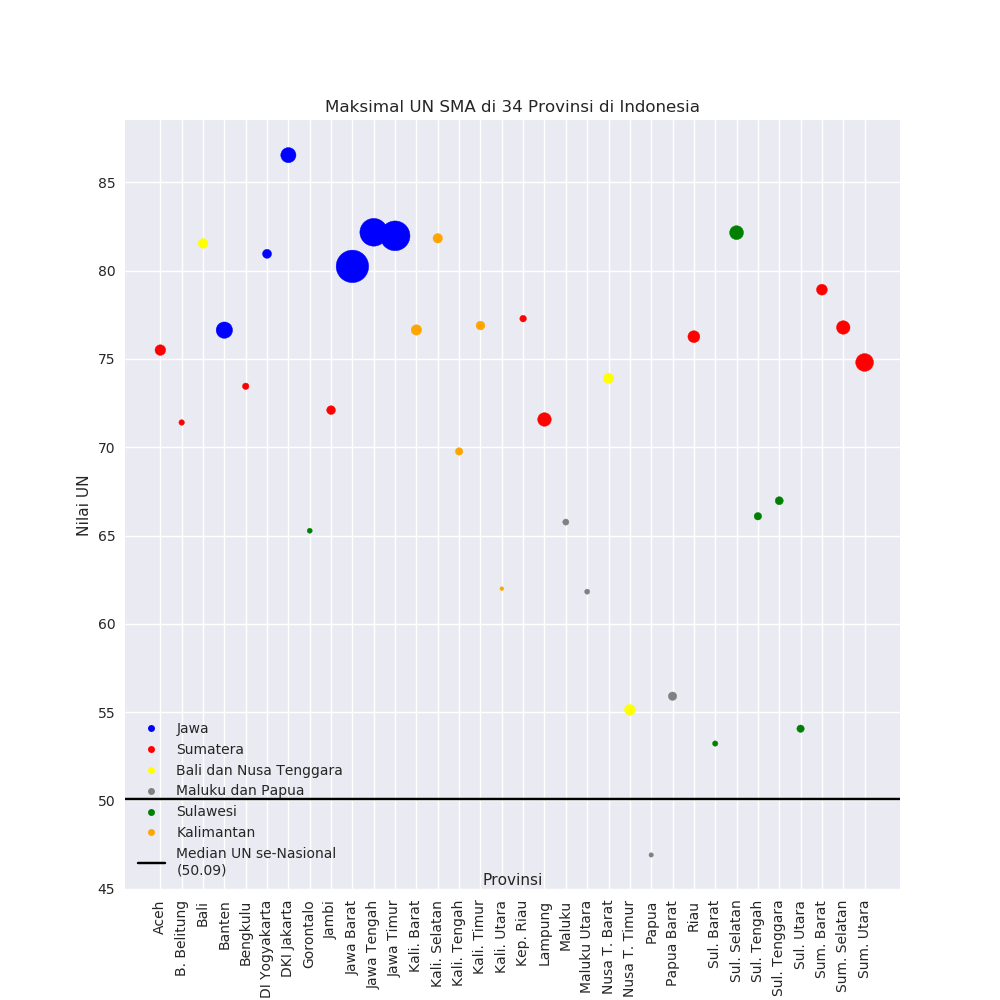

In [258]:
plt.figure(figsize=(10, 10))
plt.scatter(display_provinsi, df['Max'], s=ukuran, c=warna, label='Nilai Maksimal masing-masing provinsi')
#plt.scatter(display_provinsi, df['Min'], s=ukuran, c='red', label= 'Nilai Minimal masing-masing provinsi')
plt.axhline(data_2017['Rerata IPA tahun 2017'].median(), color='black')
plt.xticks(rotation='vertical');
plt.ylabel('Nilai UN');
plt.xlabel('Provinsi', labelpad=-90);
plt.title('Maksimal UN SMA di 34 Provinsi di Indonesia');
#plt.axvline(df['PDRB 2016'].median(), color='black', linestyle='--')

In [260]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='Jawa')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='Sumatera')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='.', linestyle='None',
                          markersize=10, label='Bali dan Nusa Tenggara')
grey_dot = mlines.Line2D([], [], color='grey', marker='.', linestyle='None',
                          markersize=10, label='Maluku dan Papua')
green_dot = mlines.Line2D([], [], color='green', marker='.', linestyle='None',
                          markersize=10, label='Sulawesi')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                          markersize=10, label='Kalimantan')
black_lines = mlines.Line2D([], [], color='black', linestyle='solid',
                          markersize=5, label='Median UN se-Nasional\n({})'.format(str(data_2017['Rerata IPA tahun 2017'].median())[:5]))

plt.legend(handles=[blue_dot, red_dot,yellow_dot, grey_dot, green_dot, orange_dot, black_lines], loc=0)
#plt.legend(handles=[black_lines], loc=2)

plt.show()

<IPython.core.display.Javascript object>


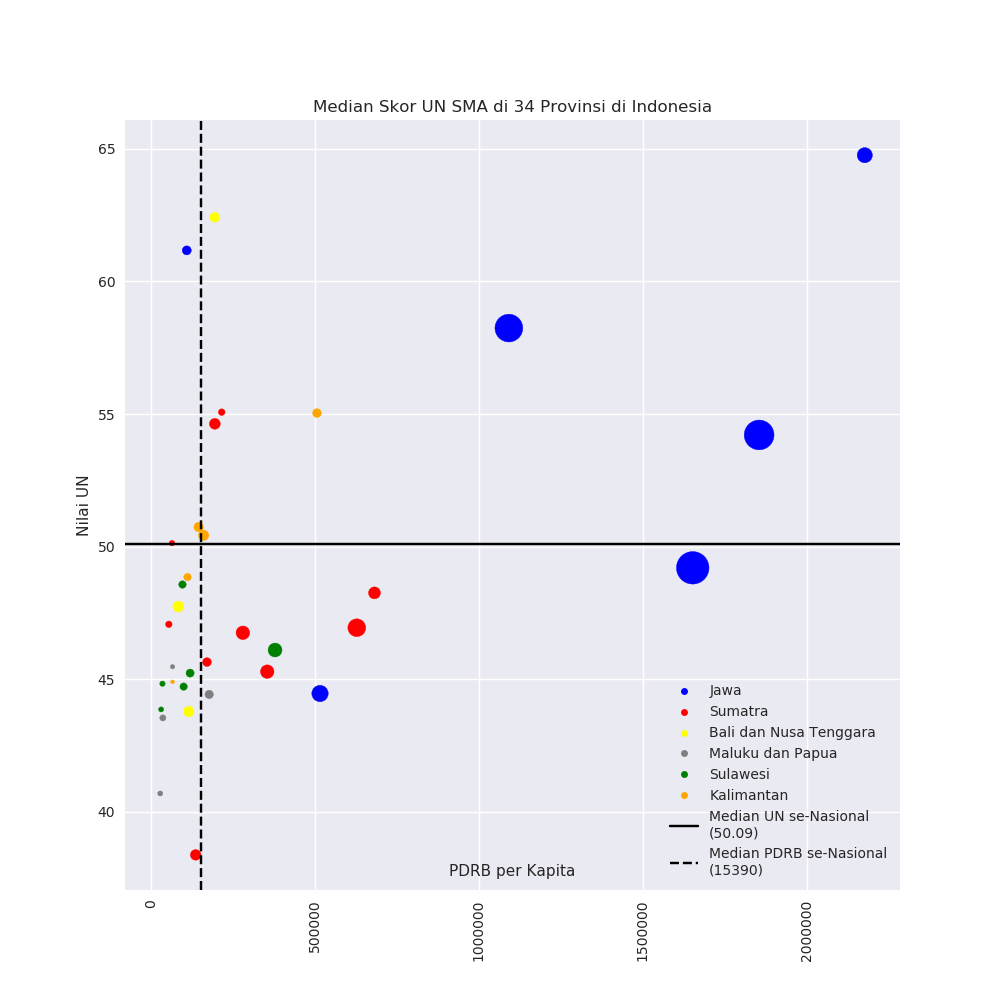

In [253]:
plt.figure(figsize=(10, 10))
plt.scatter(df['PDRB 2016'], df['Median'], s=ukuran, c=warna, label='Nilai Maksimal masing-masing provinsi')
plt.axhline(data_2017['Rerata IPA tahun 2017'].median(), color='black')
plt.xticks(rotation='vertical');
plt.ylabel('Nilai UN');
plt.xlabel('PDRB per Kapita', labelpad=-70);
plt.title('Median Skor UN SMA di 34 Provinsi di Indonesia');
plt.axvline(df['PDRB 2016'].median(), color='black', linestyle='--')

In [254]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                          markersize=10, label='Jawa')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                          markersize=10, label='Sumatra')
yellow_dot = mlines.Line2D([], [], color='yellow', marker='.', linestyle='None',
                          markersize=10, label='Bali dan Nusa Tenggara')
grey_dot = mlines.Line2D([], [], color='grey', marker='.', linestyle='None',
                          markersize=10, label='Maluku dan Papua')
green_dot = mlines.Line2D([], [], color='green', marker='.', linestyle='None',
                          markersize=10, label='Sulawesi')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                          markersize=10, label='Kalimantan')
black_lines = mlines.Line2D([], [], color='black', linestyle='solid',
                          markersize=5, label='Median UN se-Nasional\n({})'.format(str(data_2017['Rerata IPA tahun 2017'].median())[:5]))
PDRB_lines = mlines.Line2D([], [], color='black', linestyle='--',
                          markersize=5, label='Median PDRB se-Nasional\n({})'.format(str(df['PDRB 2016'].median())[:5]))

plt.legend(handles=[blue_dot, red_dot, yellow_dot, grey_dot, green_dot, orange_dot, black_lines, PDRB_lines], loc=0)
#plt.legend(handles=[black_lines], loc=2)

plt.show()